In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import scale
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

# Step 1: Get a rough result first

In [2]:
data = pd.read_csv('session8_homework.csv',index_col='clientid')

X = np.array(data[['age','LTI']])
y = np.array(data.iloc[:,-1])

In [3]:
# split the data into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
clf = MLPClassifier(solver='lbfgs', activation='logistic', learning_rate_init=0.001, alpha=1e-5, hidden_layer_sizes=(4, 1), random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [5]:
print(confusion_matrix(y_test,y_pred,labels=[0,1]))

[[494  14]
 [ 13  79]]


In [6]:
print(classification_report(y_test,y_pred,digits=4))

             precision    recall  f1-score   support

          0     0.9744    0.9724    0.9734       508
          1     0.8495    0.8587    0.8541        92

avg / total     0.9552    0.9550    0.9551       600



### If we standardize the data first, check out if the result would be different.

In [7]:
X_train = scale(X_train)
X_test = scale(X_test)

In [8]:
clf = MLPClassifier(solver='lbfgs', activation='logistic', learning_rate_init=0.001, alpha=1e-5, hidden_layer_sizes=(4, 1), random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [9]:
print(confusion_matrix(y_test,y_pred,labels=[0,1]))

[[508   0]
 [  6  86]]


In [10]:
print(classification_report(y_test,y_pred,digits=4))

             precision    recall  f1-score   support

          0     0.9883    1.0000    0.9941       508
          1     1.0000    0.9348    0.9663        92

avg / total     0.9901    0.9900    0.9899       600



### We can see the result improves a lot. Accuracy improves from 95.52% to 99.01%

# Step 2: Use grid search to find possible 'best' parameters

In [11]:
# Set the parameters by cross-validation
parameters = [{'solver': ['lbfgs', 'sgd', 'adam'],
               'activation': ['logistic', 'tanh', 'relu'],
               'hidden_layer_sizes': [(4, 1)],
               'random_state': [1]}]

print("# Tuning hyper-parameters")
print()

clf = GridSearchCV(MLPClassifier(), parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Tuning hyper-parameters



D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklea

Best parameters set found on development set:

{'activation': 'logistic', 'hidden_layer_sizes': (4, 1), 'random_state': 1, 'solver': 'lbfgs'}

Grid scores on training set:

0.998 (+/-0.003) for {'activation': 'logistic', 'hidden_layer_sizes': (4, 1), 'random_state': 1, 'solver': 'lbfgs'}
0.864 (+/-0.002) for {'activation': 'logistic', 'hidden_layer_sizes': (4, 1), 'random_state': 1, 'solver': 'sgd'}
0.864 (+/-0.002) for {'activation': 'logistic', 'hidden_layer_sizes': (4, 1), 'random_state': 1, 'solver': 'adam'}
0.997 (+/-0.005) for {'activation': 'tanh', 'hidden_layer_sizes': (4, 1), 'random_state': 1, 'solver': 'lbfgs'}
0.864 (+/-0.002) for {'activation': 'tanh', 'hidden_layer_sizes': (4, 1), 'random_state': 1, 'solver': 'sgd'}
0.864 (+/-0.002) for {'activation': 'tanh', 'hidden_layer_sizes': (4, 1), 'random_state': 1, 'solver': 'adam'}
0.997 (+/-0.005) for {'activation': 'relu', 'hidden_layer_sizes': (4, 1), 'random_state': 1, 'solver': 'lbfgs'}
0.864 (+/-0.002) for {'activation': '

### We can see that the best parameters are the same with before. And sgd solver doesn't converge well in this case.

### There's a usdeful note in the documentation of sklearn.neural_network.MLPClassifier. 

### Quoted:The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

In [12]:
clf = MLPClassifier(solver='lbfgs', activation='logistic', learning_rate_init=0.001, alpha=1e-5, hidden_layer_sizes=(4, 1), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [13]:
print(confusion_matrix(y_test,y_pred,labels=[0,1]))

[[508   0]
 [  6  86]]


In [14]:
print(classification_report(y_test,y_pred,digits=4))

             precision    recall  f1-score   support

          0     0.9883    1.0000    0.9941       508
          1     1.0000    0.9348    0.9663        92

avg / total     0.9901    0.9900    0.9899       600



# Step 3: Plot

### Copied from online resources

In [15]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes,
coefs_, 
intercepts_,
n_iter_, 
loss_, 
np, plt):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Input-Arrows
    layer_top_0 = v_spacing*(layer_sizes[0] - 1)/2. + (top + bottom)/2.
    for m in range(layer_sizes[0]):
        plt.arrow(left-0.18, layer_top_0 - m*v_spacing, 0.12, 0,  lw =1, head_width=0.01, head_length=0.02)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/8.,\
                            color='w', ec='k', zorder=4)
            if n == 0:
                plt.text(left-0.125, layer_top - m*v_spacing, r'$X_{'+str(m+1)+'}$', fontsize=15)
            elif (n_layers == 3) & (n == 1):
                plt.text(n*h_spacing + left+0.00, layer_top - m*v_spacing+ (v_spacing/8.+0.01*v_spacing), r'$H_{'+str(m+1)+'}$', fontsize=15)
            elif n == n_layers -1:
                plt.text(n*h_spacing + left+0.10, layer_top - m*v_spacing, r'$y_{'+str(m+1)+'}$', fontsize=15)
            ax.add_artist(circle)#
    # Bias-Nodes
    for n, layer_size in enumerate(layer_sizes):
        if n < n_layers -1:
            x_bias = (n+0.5)*h_spacing + left
            y_bias = top + 0.005
            circle = plt.Circle((x_bias, y_bias), v_spacing/8.,\
                            color='w', ec='k', zorder=4)
            plt.text(x_bias-(v_spacing/8.+0.10*v_spacing+0.01), y_bias, r'$1$', fontsize=15)
            ax.add_artist(circle)   
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            print(m)
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                              [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                xm = (n*h_spacing + left)
                xo = ((n + 1)*h_spacing + left)
                ym = (layer_top_a - m*v_spacing)
                yo = (layer_top_b - o*v_spacing)
                rot_mo_rad = np.arctan((yo-ym)/(xo-xm))
                rot_mo_deg = rot_mo_rad*180./np.pi
                xm1 = xm + (v_spacing/8.+0.05)*np.cos(rot_mo_rad)
                if n == 0:
                    if yo > ym:
                        ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
                    else:
                        ym1 = ym + (v_spacing/8.+0.05)*np.sin(rot_mo_rad)
                else:
                    if yo > ym:
                        ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
                    else:
                        ym1 = ym + (v_spacing/8.+0.04)*np.sin(rot_mo_rad)
                plt.text( xm1, ym1,\
                     str(round(coefs_[n][m, o],4)),\
                     rotation = rot_mo_deg, \
                     fontsize = 10)
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        if n < n_layers-1:
            layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
            layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
            x_bias = (n+0.5)*h_spacing + left
            y_bias = top + 0.005 
            for o in range(layer_size_b):
                print(o)
                line = plt.Line2D([x_bias, (n + 1)*h_spacing + left],
                          [y_bias, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                xo = ((n + 1)*h_spacing + left)
                yo = (layer_top_b - o*v_spacing)
                rot_bo_rad = np.arctan((yo-y_bias)/(xo-x_bias))
                rot_bo_deg = rot_bo_rad*180./np.pi
                xo2 = xo - (v_spacing/8.+0.01)*np.cos(rot_bo_rad)
                yo2 = yo - (v_spacing/8.+0.01)*np.sin(rot_bo_rad)
                xo1 = xo2 -0.05 *np.cos(rot_bo_rad)
                yo1 = yo2 -0.05 *np.sin(rot_bo_rad)
                plt.text( xo1, yo1,\
                str(round(intercepts_[n][o],4)),\
                 rotation = rot_bo_deg, \
                 fontsize = 10) 

0
1
0
1
2
3
0
1
2
3
0


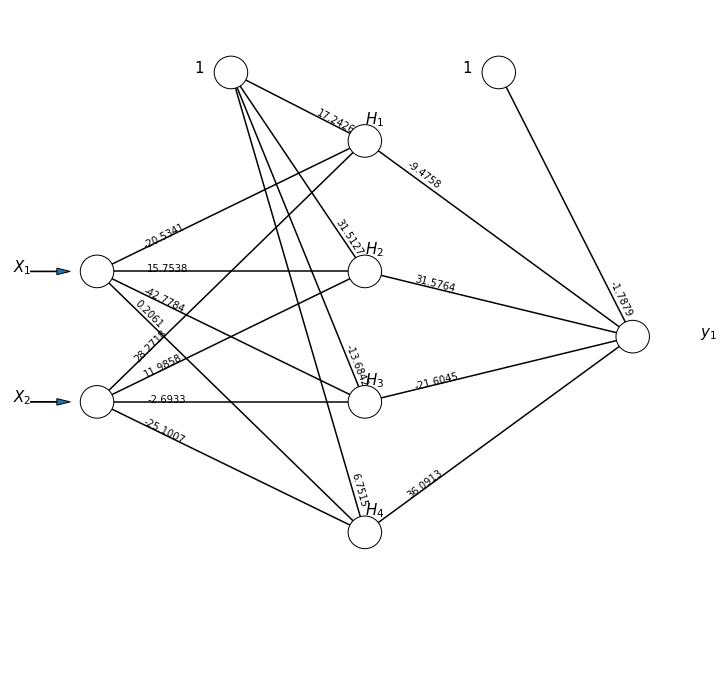

In [16]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

draw_neural_net(ax, .1, .9, .1, .9, [2, 4, 1], clf.coefs_, clf.intercepts_, clf.n_iter_, clf.loss_,np, plt)